# Категории товаров: метод главных компонентов (день 2)

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE

Подготавливаем обучающую выборку:

In [6]:
df = pd.read_csv('Dataset 10.21/products_dns_sorted.csv').dropna()
df_cat = pd.read_csv('Dataset 10.21/categories.csv').dropna()
df['category_id'].replace(df_cat.set_index('category_id').to_dict()['category_name'], inplace=True)
df.rename(columns = {'category_id': 'category'},  inplace = True)
df['description'] = df['description'].str.lower()

df = df.head(5000)

Создаем матрицу частот слов:

In [7]:
features = df['description']
answers = df['category']
cnt_vec = CountVectorizer(max_features = 1000)
answers = cnt_vec.fit_transform(answers)

TSNE

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

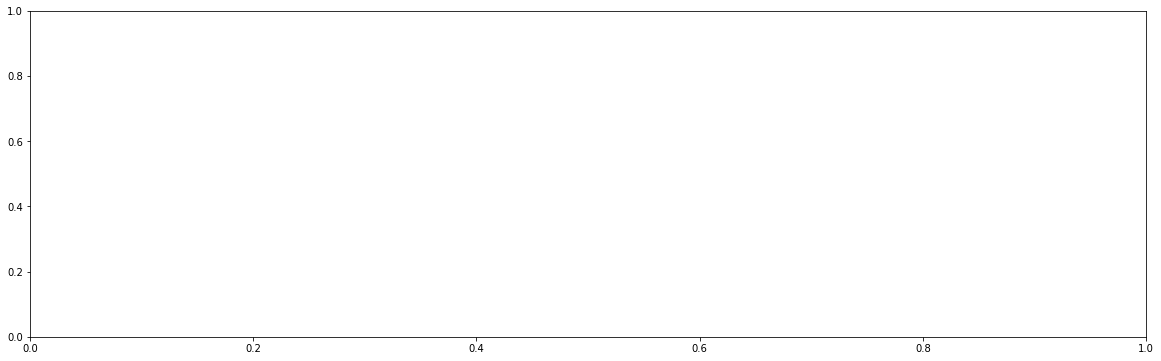

In [8]:
tsne = TSNE()
components = tsne.fit_transform(answers.toarray())
plt.rcParams["figure.figsize"] = (20, 6)
plt.scatter(x=components[:,0], y=components[:,1], c=answers)

PCA

In [4]:
pca = PCA(n_components = 2)
pca.fit(features.toarray())

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)